# Import Libraries

#Assignment Target

Test Accuracy: 99.4

Total Number of Parameters: 8000

#Results obtained in Fourth Submission

Best Test Accuracy: 99.13

Number of Parameters Used: 7770

#Analysis - Receptive Field & other dimension calculations

RF Field and other dimension calculations would be same like 2nd submission. In this submission, we are adding batch normalization layer along with dropout with dropout rate as 0.05 (except at the last layer) after convolutions. 

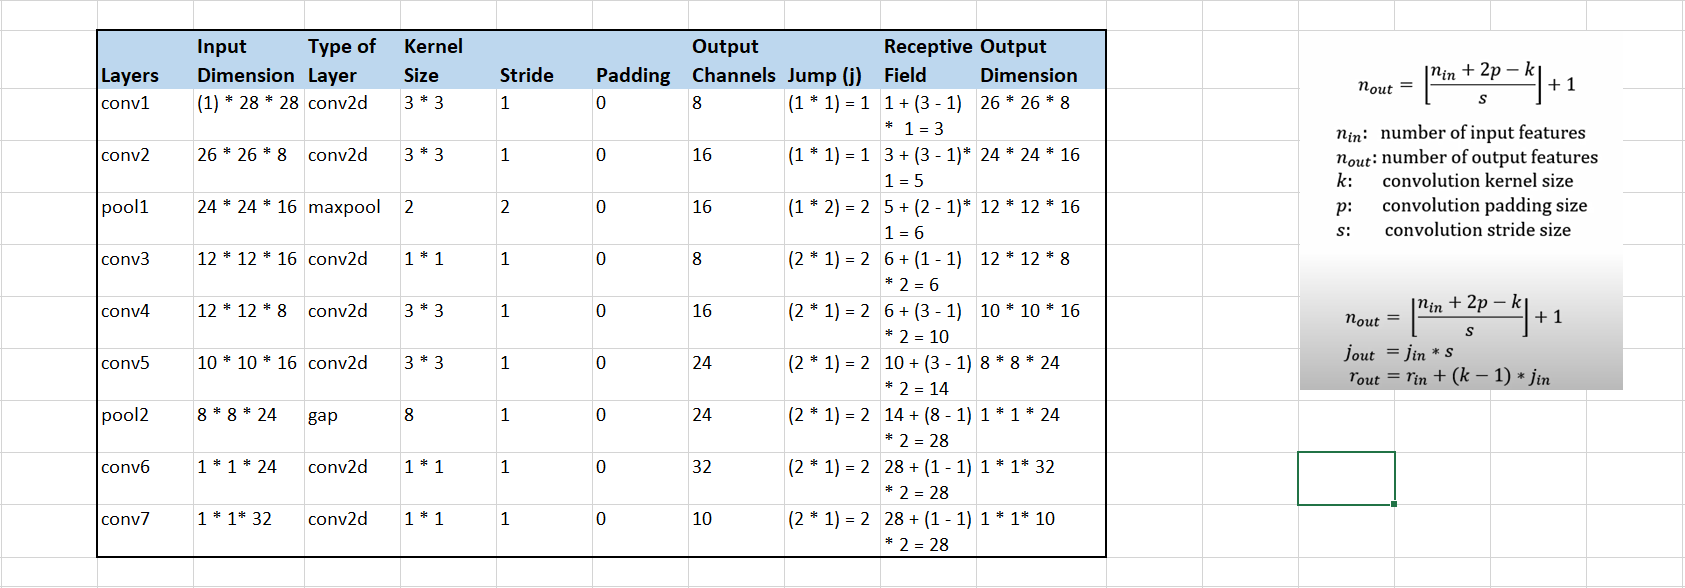

#Analysis - Train Accuracy between 3rd and 4th Submission (bath normalization vs batch normalization with dropout)

Overall training accuracy is bit lower while we introduced dropout with batch normalization when compared with only batch normalization. It means dropout regularizes the training and keeps room for training improvement unless we reached desired test accuracy.


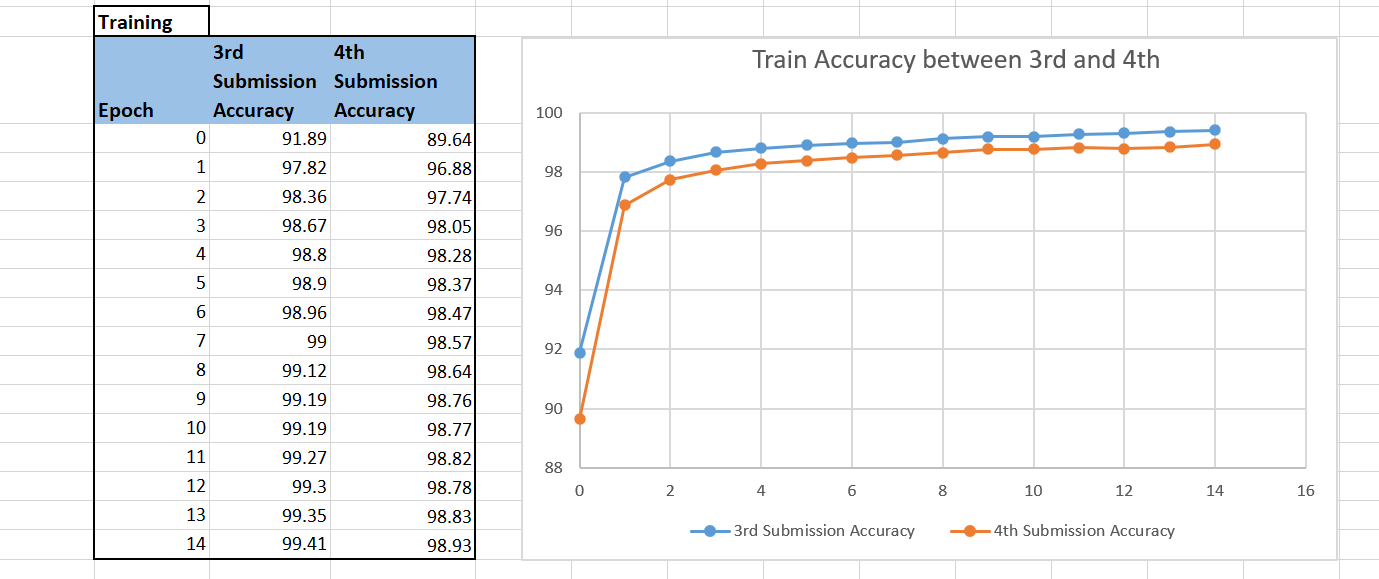

#Analysis - Test Accuracy Comparison between 3rd and 4th Submission

Test Accuracy is comparable while batch normalization is only accompanied by dropout.

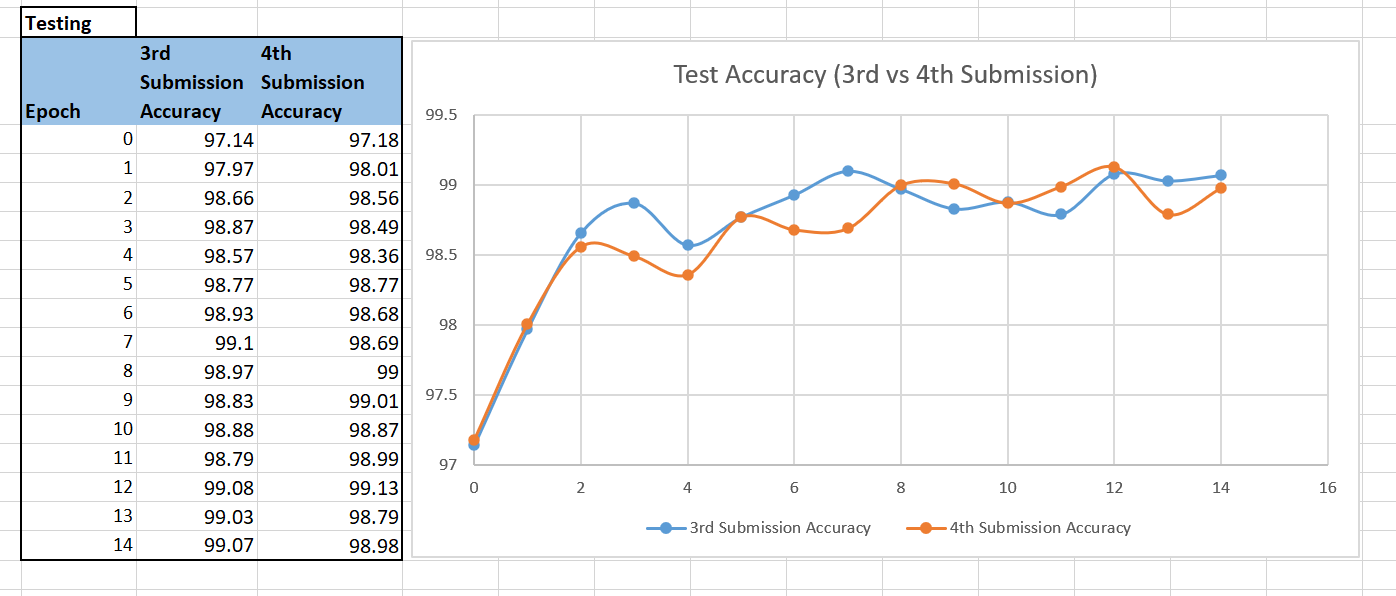

#Analysis of train and test accuracy difference between 3rd and 4th submission

While the training progresses and sufficiently close to the target number of epochs, we see that introducing dropoff has made the difference between train and test accuracy to come down. So in other words test accuracy would be numerically approximated based upon the training accuracy we get.

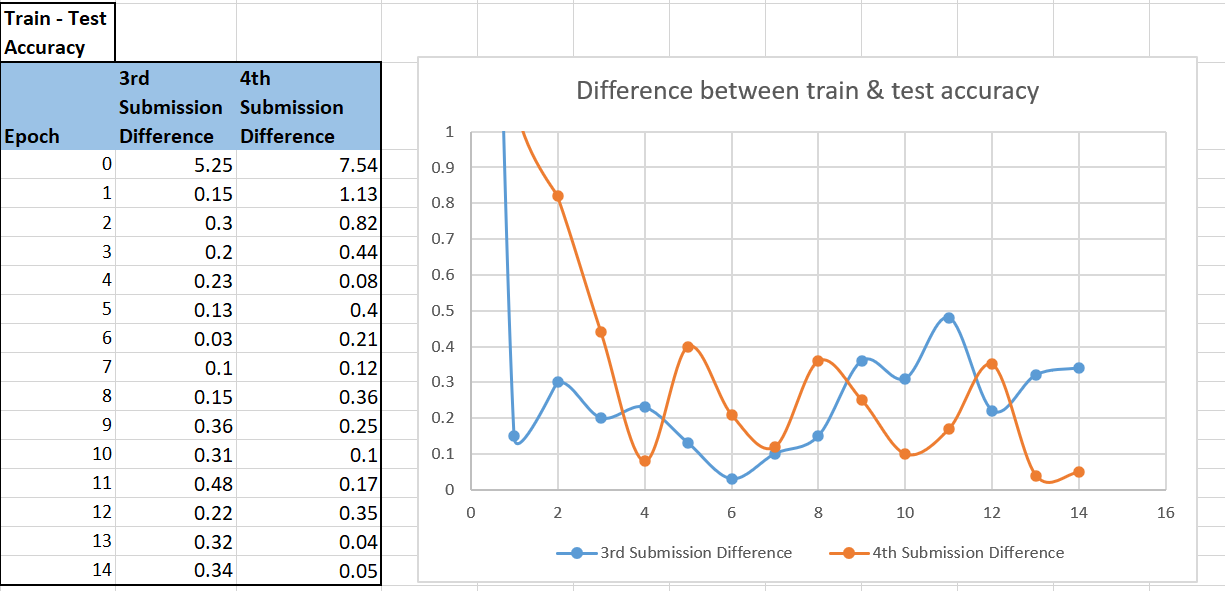

#Comments

1. Looks like introducing dropoff has regularized the training and correlation between train and test accuracy. Detailed other comparison statistics are described alongside the charts.

2. Although we are within limit in using number of model parameters, still out peak test accuracy hasn't touched the target accuracy. We would work upon that in next series of submissions.

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


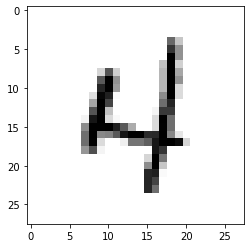

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible.

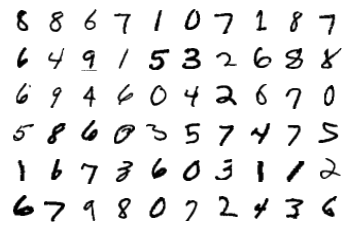

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?



In [7]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3) # 26 * 26 * 8
        self.bn1 = nn.BatchNorm2d(8) # 26 * 26 * 8
        self.conv2 = nn.Conv2d(8, 16, 3) # 24 * 24 * 16
        self.bn2 = nn.BatchNorm2d(16) # 24 * 24 * 16
        self.pool1 = nn.MaxPool2d(2, 2) # 12 * 12 * 16
        self.conv3 = nn.Conv2d(16, 8, 1) # 12 * 12 * 8
        self.bn3 = nn.BatchNorm2d(8) # 12 * 12 * 8

        self.conv4 = nn.Conv2d(8, 16, 3) # 10 * 10 * 16
        self.bn4 = nn.BatchNorm2d(16) # 10 * 10 * 16
        self.conv5 = nn.Conv2d(16, 24, 3) # 8 * 8 * 24
        self.bn5 = nn.BatchNorm2d(24) # 8 * 8 * 24
        self.pool2 = nn.AvgPool2d(8) # 1 * 1 * 24

        self.conv6 = nn.Conv2d(24, 32, 1) # 1 * 1 * 32
        self.bn6 = nn.BatchNorm2d(32) # 1 * 1 * 32
        self.conv7 = nn.Conv2d(32, 16, 1) # 1 * 1 * 16
        self.bn7 = nn.BatchNorm2d(16) # 1 * 1 * 16
        self.conv8 = nn.Conv2d(16, 10, 1) # 1 * 1 * 10

        self.dropout = nn.Dropout(0.05)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.dropout(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.dropout(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.dropout(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.bn4(x)
        x = self.dropout(x)

        x = self.conv5(x)
        x = F.relu(x)
        x = self.bn5(x)
        x = self.dropout(x)
        x = self.pool2(x)

        x = self.conv6(x)
        x = F.relu(x)
        x = self.bn6(x)
        x = self.dropout(x)

        x = self.conv7(x)
        x = F.relu(x)
        x = self.bn7(x)
        x = self.dropout(x)

        x = self.conv8(x)

        '''
        x = nn.Dropout(self.bn3(self.conv3(self.pool1(nn.Dropout(self.bn2(self.conv2(F.relu(nn.Dropout(self.bn1(self.conv1(x)), 0.05)))), 0.05)))), 0.05)
        x = self.pool2(nn.Dropout(self.bn5(F.relu(self.conv5(nn.Dropout(self.bn4(F.relu(self.conv4(x))), 0.05)))), 0.05)),
        x = self.conv8(nn.Dropout(self.bn7(F.relu(self.conv7(nn.Dropout(self.bn6(F.relu(self.conv6(x))), 0.05)))), 0.05))
        '''
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
            Conv2d-4           [-1, 16, 24, 24]           1,168
       BatchNorm2d-5           [-1, 16, 24, 24]              32
           Dropout-6           [-1, 16, 24, 24]               0
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             136
       BatchNorm2d-9            [-1, 8, 12, 12]              16
          Dropout-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,168
      BatchNorm2d-12           [-1, 16, 10, 10]              32

# Training and Testing

In [10]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

# Let's Train and test our model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.09455364942550659 Batch_id=468 Accuracy=89.64: 100%|██████████| 469/469 [00:18<00:00, 25.80it/s]



Test set: Average loss: 0.0913, Accuracy: 9718/10000 (97.18%)

EPOCH: 1


Loss=0.1343652456998825 Batch_id=468 Accuracy=96.88: 100%|██████████| 469/469 [00:15<00:00, 30.80it/s]



Test set: Average loss: 0.0663, Accuracy: 9801/10000 (98.01%)

EPOCH: 2


Loss=0.1577949970960617 Batch_id=468 Accuracy=97.74: 100%|██████████| 469/469 [00:15<00:00, 30.40it/s]



Test set: Average loss: 0.0467, Accuracy: 9856/10000 (98.56%)

EPOCH: 3


Loss=0.12714873254299164 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:15<00:00, 31.00it/s]



Test set: Average loss: 0.0507, Accuracy: 9849/10000 (98.49%)

EPOCH: 4


Loss=0.07319943606853485 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:15<00:00, 31.07it/s]



Test set: Average loss: 0.0557, Accuracy: 9836/10000 (98.36%)

EPOCH: 5


Loss=0.037692248821258545 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:15<00:00, 30.04it/s]



Test set: Average loss: 0.0409, Accuracy: 9877/10000 (98.77%)

EPOCH: 6


Loss=0.03277427703142166 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:15<00:00, 30.79it/s]



Test set: Average loss: 0.0417, Accuracy: 9868/10000 (98.68%)

EPOCH: 7


Loss=0.1435360461473465 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:16<00:00, 29.29it/s]



Test set: Average loss: 0.0408, Accuracy: 9869/10000 (98.69%)

EPOCH: 8


Loss=0.012902501039206982 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:15<00:00, 30.80it/s]



Test set: Average loss: 0.0334, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


Loss=0.0072029666043818 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:15<00:00, 30.89it/s]



Test set: Average loss: 0.0312, Accuracy: 9901/10000 (99.01%)

EPOCH: 10


Loss=0.0102304145693779 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:15<00:00, 30.99it/s]



Test set: Average loss: 0.0388, Accuracy: 9887/10000 (98.87%)

EPOCH: 11


Loss=0.06496897339820862 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:15<00:00, 30.64it/s]



Test set: Average loss: 0.0337, Accuracy: 9899/10000 (98.99%)

EPOCH: 12


Loss=0.0763937458395958 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:15<00:00, 30.75it/s]



Test set: Average loss: 0.0307, Accuracy: 9913/10000 (99.13%)

EPOCH: 13


Loss=0.031496454030275345 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:15<00:00, 30.83it/s]



Test set: Average loss: 0.0426, Accuracy: 9879/10000 (98.79%)

EPOCH: 14


Loss=0.11864728480577469 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:15<00:00, 30.42it/s]



Test set: Average loss: 0.0333, Accuracy: 9898/10000 (98.98%)

